In [1]:
import os
import sys

if os.path.join(os.path.dirname(os.getcwd()), "controller") not in sys.path:
    sys.path.append(os.path.join(os.path.dirname(os.getcwd()), "controller"))
from nhl_data_downloader import NHLDataDownloader
from nhl_data_loader import NHLDataLoader

loader = NHLDataLoader()
downloader = NHLDataDownloader()

In [2]:
#will download all seasons from 2016 to 2019
train_val_df = loader.load_csv_files([2016,2017,2018,2019])
print(train_val_df.head())

      game_id   game_date  home_team_id  period time_in_period  event_id  \
0  2016020001  2016-10-12             9       1          00:00         5   
1  2016020001  2016-10-12             9       1          00:00         6   
2  2016020001  2016-10-12             9       1          00:05        51   
3  2016020001  2016-10-12             9       1          00:05         7   
4  2016020001  2016-10-12             9       1          00:43       201   

     event_type  is_goal shot_type  x_coord  ...  last_x_coord  last_y_coord  \
0  period-start    False   Unknown      NaN  ...       unknown       unknown   
1       faceoff    False   Unknown      0.0  ...       unknown       unknown   
2      stoppage    False   Unknown      NaN  ...       unknown       unknown   
3       faceoff    False   Unknown     69.0  ...       unknown       unknown   
4      takeaway    False   Unknown    -81.0  ...       unknown       unknown   

  time_since_last_event distance_from_last_event  rebound  \
0

In [3]:

import logistic_model_analyzer
import importlib
importlib.reload(logistic_model_analyzer)
from logistic_model_analyzer import LogisticModelAnalyzer

analyzer = LogisticModelAnalyzer(train_val_df)
analyzer.run_analysis(features=["shooting_distance"])


Filtering data...
Preparing data...
Preparing data with features: ['shooting_distance']...
Training set size: 261860
Data prepared:
 - Training samples: 261860
 - Validation samples: 65465
Training model...
1155309    False
926331     False
528178     False
121079     False
777920     False
           ...  
416502     False
1499924    False
259485     False
821774     False
28181      False
Name: is_goal, Length: 261860, dtype: bool
Evaluating model...
Validation Accuracy: 0.91

Plotting confusion matrix...


In [48]:
analyzer.run_analysis(features=["shooting_distance"],apply_smote=True)

Filtering data...
Preparing data...
Preparing data with features: ['shooting_distance']...
Training set size: 261860
Data prepared:
 - Training samples: 261860
 - Validation samples: 65465
Applying SMOTE to oversample minority class...
SMOTE applied. Training data balanced: 474202 samples.
Training model...
0         False
1         False
2         False
3         False
4         False
          ...  
474197     True
474198     True
474199     True
474200     True
474201     True
Name: is_goal, Length: 474202, dtype: bool
Evaluating model...
Validation Accuracy: 0.55

Plotting confusion matrix...


wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.
wandb: Currently logged in as: toma-allary (toma-allary-universit-de-montr-al). Use `wandb login --relogin` to force relogin


Training Distance Only model...
Preparing data with features: ['shooting_distance']...
Training set size: 261860
Data prepared:
 - Training samples: 261860
 - Validation samples: 65465
Logging metrics: AUC=0.6712211529815664, Log Loss=0.30674274747279257
Training Angle Only model...
Preparing data with features: ['shot_angle']...
Training set size: 261860
Data prepared:
 - Training samples: 261860
 - Validation samples: 65465
Logging metrics: AUC=0.49876803650390067, Log Loss=0.3112678181813812
Training Distance and Angle model...
Preparing data with features: ['shooting_distance', 'shot_angle']...
Training set size: 261860
Data prepared:
 - Training samples: 261860
 - Validation samples: 65465
Logging metrics: AUC=0.6700908834422654, Log Loss=0.30568887987580423
Generating random probabilities for Random Baseline...
Logging metrics: AUC=0.49967904760383797, Log Loss=0.9978181478373643


AUC,█▁█▁
Log Loss,▁▁▁█
AUC,0.49968
Log Loss,0.99782


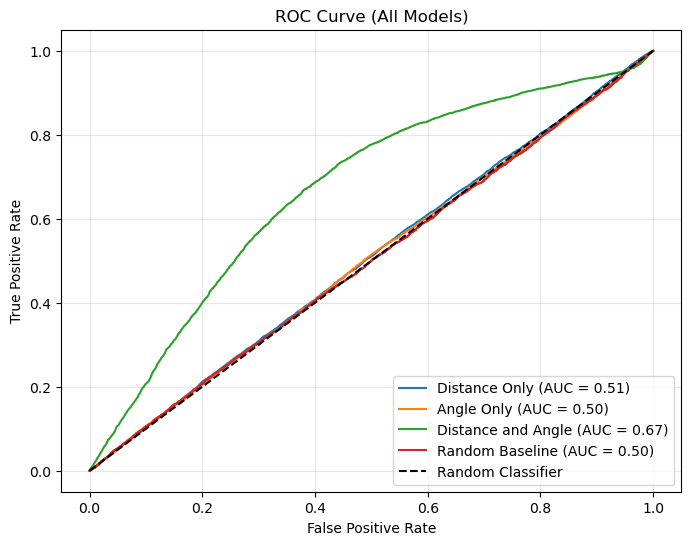

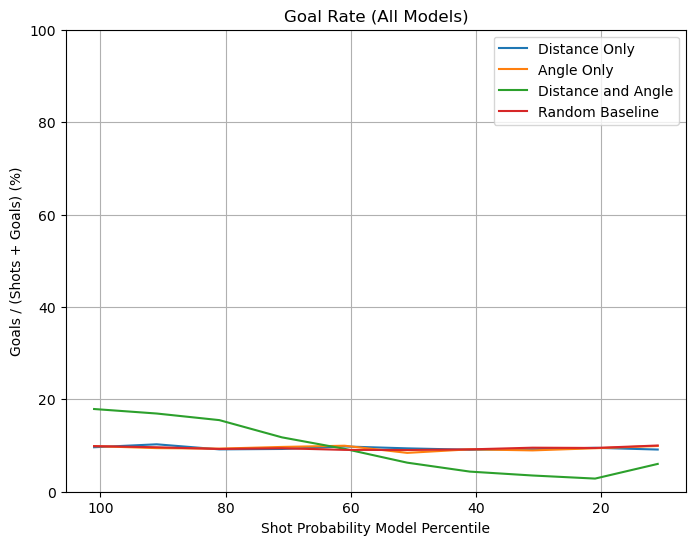

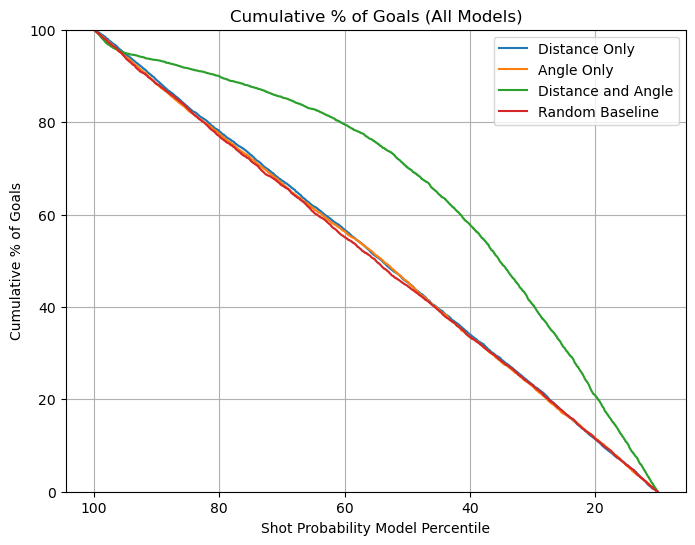

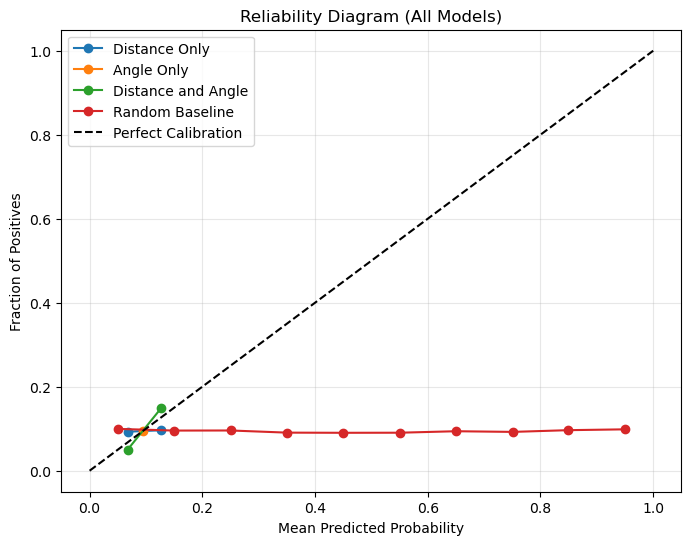

In [4]:
import wandb
import os
os.environ['WANDB_INIT_TIMEOUT'] = '600'

my_key = os.environ.get('WANDB_API_KEY')
wandb.login(key=my_key, force=True)

analyzer.evaluate_multiple_models()
